In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# nltk.download('punkt')

# nltk.download('stopwords')
# nltk.download('wordnet')

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

data = pd.read_csv("/workspaces/NLP_Proj/Final_NLP-main/01_intermediate-files/smokers_train_all_separated.csv")
print(data.sample(6))

     Smoking Status                                               Text
320         UNKNOWN  admission date: 08/05/2001 report status:  dis...
108         UNKNOWN  report status: signed discharge summary name: ...
308          SMOKER  admission date: 06/09/1998 report status: sign...
14   CURRENT SMOKER  report status: unsigned admission date: 12-3-9...
385         UNKNOWN  report status: signed ob emr l and d\ndischarg...
329         UNKNOWN  report status: unsigned\ned discharge notifica...


In [4]:
data["Smoking Status"] = data["Smoking Status"].replace("SMOKER", "PAST SMOKER")

In [5]:
le = LabelEncoder()
data["Smoking_enc"] = le.fit_transform(data["Smoking Status"])
display(data.sample(6))

,Smoking Status,Text,Smoking_enc
63,PAST SMOKER,report status: signed discharge summary name: ...,2
0,CURRENT SMOKER,report status: unsigned\nplease do not go abov...,0
107,UNKNOWN,report status: unsigned\ned discharge notifica...,3
224,UNKNOWN,report status: unsigned admission date: 2-23-9...,3
242,UNKNOWN,report status: unsigned admission date: 10-03-...,3
364,UNKNOWN,report status: unsigned\nplease do not go abov...,3


In [6]:
data["Smoking_enc"] = data["Smoking_enc"].astype("int64")
print(data.dtypes)

Smoking Status    object
Text              object
Smoking_enc        int64
dtype: object


In [7]:
print(data["Smoking Status"].value_counts())

Smoking Status
UNKNOWN           252
NON-SMOKER         66
PAST SMOKER        45
CURRENT SMOKER     35
Name: count, dtype: int64


In [8]:
import re

clean_messages = data["Text"].str.lower()
clean_text = []
for message in clean_messages:
    pattern = r"(\S+\s){0,5}\S*(smok|tobacco|cigar|pack|ppd)\S*(\s\S+){0,5}"
    match = re.search(pattern, message, re.IGNORECASE)

    if match:
        matched_text = match.group(0)
        clean_text.append(matched_text)
    else:
        # sentence = "no information"
        clean_text.append(message)

data["Text"] = clean_text
print(data["Text"])

0      to excess , pipe and cigar smoker for many yea...
1      the patient has a 20 pack-year smoking history...
2      alcohol use .\nhas been smoking approximately ...
3      and vomiting . social history: smoker for grea...
4      times per week .\n1-2 packs per day . hospital...
                             ...                        
393    report status: unsigned\ned discharge notifica...
394    report status: unsigned\ned discharge notifica...
395          a / p repair vag pack / foley , ebl minimal
396    admission date: 05/25/2002 report status:  dis...
397    admission date: 11/27/2003 report status:  dis...
Name: Text, Length: 398, dtype: object


In [9]:
sans_punctuation = []
import string, re

for i in data["Text"]:
    sans_punctuation.append(re.sub(r"[^a-zA-Z0-9]"," ", i))

print(sans_punctuation)

['to excess   pipe and cigar smoker for many years  ', 'the patient has a 20 pack year smoking history   she reports', 'alcohol use   has been smoking approximately 10 cigarettes a day', 'and vomiting   social history  smoker for greater than 100 pack', 'times per week   1 2 packs per day   hospital course ', 'patient is a 1 1 2 pack per day smoker   he', 'the patient is a longstanding smoker with many years of heavy', 'the patient unfortunately continues to smoke and has greater than a', 'to sulfa   habits  50 pack year smoking history   still', 'is notable for a heavy smoking history   she is interested', 'history  he has been a smoker for the last 50 years', 'cholesterol   and history of tobacco use   who is status', 'any of his medications and smoked and drank heavily throughout the', 'diabetes mellitus   hypercholesterolemia   tobacco use and a positive family', 'of nahuter with a 70  pack year smoking history   2', 'year old lady   chronic smoker is admitted with increasing short

In [10]:
from nltk.tokenize import word_tokenize
preprocessed_documents = []
for i in sans_punctuation:
    preprocessed_documents.append(word_tokenize(i))

print(preprocessed_documents)

[['to', 'excess', 'pipe', 'and', 'cigar', 'smoker', 'for', 'many', 'years'], ['the', 'patient', 'has', 'a', '20', 'pack', 'year', 'smoking', 'history', 'she', 'reports'], ['alcohol', 'use', 'has', 'been', 'smoking', 'approximately', '10', 'cigarettes', 'a', 'day'], ['and', 'vomiting', 'social', 'history', 'smoker', 'for', 'greater', 'than', '100', 'pack'], ['times', 'per', 'week', '1', '2', 'packs', 'per', 'day', 'hospital', 'course'], ['patient', 'is', 'a', '1', '1', '2', 'pack', 'per', 'day', 'smoker', 'he'], ['the', 'patient', 'is', 'a', 'longstanding', 'smoker', 'with', 'many', 'years', 'of', 'heavy'], ['the', 'patient', 'unfortunately', 'continues', 'to', 'smoke', 'and', 'has', 'greater', 'than', 'a'], ['to', 'sulfa', 'habits', '50', 'pack', 'year', 'smoking', 'history', 'still'], ['is', 'notable', 'for', 'a', 'heavy', 'smoking', 'history', 'she', 'is', 'interested'], ['history', 'he', 'has', 'been', 'a', 'smoker', 'for', 'the', 'last', '50', 'years'], ['cholesterol', 'and', 'hist

In [11]:
frequency_list = []

import pprint
from collections import Counter
for i in preprocessed_documents:
    frequency_list.append(dict(Counter(i)))

pprint.pprint(frequency_list)

[{'and': 1,
  'cigar': 1,
  'excess': 1,
  'for': 1,
  'many': 1,
  'pipe': 1,
  'smoker': 1,
  'to': 1,
  'years': 1},
 {'20': 1,
  'a': 1,
  'has': 1,
  'history': 1,
  'pack': 1,
  'patient': 1,
  'reports': 1,
  'she': 1,
  'smoking': 1,
  'the': 1,
  'year': 1},
 {'10': 1,
  'a': 1,
  'alcohol': 1,
  'approximately': 1,
  'been': 1,
  'cigarettes': 1,
  'day': 1,
  'has': 1,
  'smoking': 1,
  'use': 1},
 {'100': 1,
  'and': 1,
  'for': 1,
  'greater': 1,
  'history': 1,
  'pack': 1,
  'smoker': 1,
  'social': 1,
  'than': 1,
  'vomiting': 1},
 {'1': 1,
  '2': 1,
  'course': 1,
  'day': 1,
  'hospital': 1,
  'packs': 1,
  'per': 2,
  'times': 1,
  'week': 1},
 {'1': 2,
  '2': 1,
  'a': 1,
  'day': 1,
  'he': 1,
  'is': 1,
  'pack': 1,
  'patient': 1,
  'per': 1,
  'smoker': 1},
 {'a': 1,
  'heavy': 1,
  'is': 1,
  'longstanding': 1,
  'many': 1,
  'of': 1,
  'patient': 1,
  'smoker': 1,
  'the': 1,
  'with': 1,
  'years': 1},
 {'a': 1,
  'and': 1,
  'continues': 1,
  'greater': 1,


#### Bag of Words Implementation 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [13]:
text_list = data["Text"].astype(str).tolist()
print(text_list)

['to excess , pipe and cigar smoker for many years .', 'the patient has a 20 pack-year smoking history .\nshe reports', 'alcohol use .\nhas been smoking approximately 10 cigarettes a day', 'and vomiting . social history: smoker for greater than 100 pack', 'times per week .\n1-2 packs per day . hospital course:', 'patient is a 1 1/2 pack per day smoker .\nhe', 'the patient is a longstanding smoker with many years of heavy', 'the patient unfortunately continues to smoke and has greater than a', 'to sulfa . habits: 50 pack year smoking history , still', 'is notable for a heavy smoking history .\nshe is interested', 'history: he has been a smoker for the last 50 years', 'cholesterol , and history of tobacco use , who is status', 'any of his medications and smoked and drank heavily throughout the', 'diabetes mellitus , hypercholesterolemia , tobacco use and a positive family', 'of nahuter with a 70+ pack year smoking history ( 2', 'year old lady , chronic smoker is admitted with increasing 

In [14]:
from collections import Counter
import re

# Flatten the list and split each string into words
words = [word for text in text_list for word in re.split('\W+', text.lower()) if word]

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
most_common_tuples = word_counts.most_common()

# Extract the words from the tuples
most_common_words = [word for word, _ in most_common_tuples]

print(most_common_words)

['the', 'and', 'was', 'of', 'to', 'a', 'with', 'on', 'patient', 'in', 'for', 'd', 'discharge', 'he', 'no', 'she', 'mg', 'at', 'his', 'is', 'history', '1', 'had', 'm', '2', 'admission', 'date', 'her', 's', 'were', 'left', 'an', 'po', 'status', 'by', 'p', 'hospital', 'right', 'as', '10', '5', 'that', 'day', 'this', 'report', 'be', 'diagnosis', '4', 'q', '3', 'pain', 'normal', 'or', 'which', 'dr', 'o', 'blood', 'examination', 'not', 'i', 'course', '11', 'up', '02', 'medical', 'report_end', '6', 'medications', 'well', 'chest', 'showed', 'there', 'has', '12', 'time', 'admitted', '8', 'follow', '9', 'stable', 'have', 'physical', '7', 'disease', '03', '0', 'r', 'artery', 'revealed', '05', 'b', 'principal', 'will', '20', 'year', 'old', 'from', 'past', 'summary', 'condition', 'but', 'without', 'home', '06', '01', 'heart', 'after', 'treatment', 'pm', 'per', 'cc', '07', 'post', 'care', '04', 'other', 'also', 'been', 'unsigned', '09', 'present', 'c', '08', 'x', '93', 'one', 'room', 't', 'coronary'

In [15]:
count_vector.fit(most_common_words)
features_names = count_vector.get_feature_names_out()
features_names

array(['00', '000', '0000', ..., 'zq233', 'zukmavlardes', 'zyrtec'],
      dtype=object)

In [16]:
# count_vec = CountVectorizer(max_features=6, stop_words="english")

# data = count_vec.fit_transform(
#     data["Text"]
# ).toarray()  # Returns a sparse matric which we convert to an array

# # Put together a df with the results
# train_bow_df = pd.DataFrame(
#     data, columns=count_vec.get_feature_names_out(), index= Smoking_enc
# )

# train_bow_df

In [17]:
text_array = count_vector.transform(text_list).toarray()
print(text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [18]:
import pandas as pd

frequency_matrix = pd.DataFrame(text_array, columns=features_names)
frequency_matrix

,00,000,0000,0004,0010,0014633,004653,005,00708,0074,...,zomarg,zomaten,zone,zones,zoster,zosyn,zovirax,zq233,zukmavlardes,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data_unknown = data[data["Smoking Status"] == "UNKNOWN"]
data_non = data[data["Smoking Status"] == "NON-SMOKER"]
data_past = data[data["Smoking Status"] == "PAST SMOKER"]
data_current = data[data["Smoking Status"] == "CURRENT SMOKER"]

In [20]:
print(data_unknown.shape)
print(data_non.shape)
print(data_past.shape)
print(data_current.shape)

(252, 3)
(66, 3)
(45, 3)
(35, 3)


In [21]:
data_unknown_downsampled = data_unknown.sample(data_unknown.shape[0], random_state=42)
print(data_unknown_downsampled.shape)

(252, 3)


In [22]:
df = pd.concat([data_unknown_downsampled, data_non, data_past, data_current])
df["Smoking_enc"].value_counts()

Smoking_enc
3    252
1     66
2     45
0     35
Name: count, dtype: int64

In [23]:
# from sklearn.feature_extraction.text import CountVectorizer

# smoking_status = data["Smoking Status"]
# smoking_enc = data["Smoking_enc"]
# # Transform the data with the count vectorizer
# count_vect = CountVectorizer(max_features=6, stop_words="english")

# data = count_vect.fit_transform(
#     data["Text"]
# ).toarray()  # Returns a sparse matric which we convert to an array

# # Put together a df with the results
# train_bow_df = pd.DataFrame(
#     data, columns=count_vect.get_feature_names_out(), index=smoking_status
# )
# train_bow_df[
#     "Smoking_enc"
# ] = smoking_enc.tolist()  # tolist() needed since indices are different
# train_bow_df

# # # Apply the remove_most_recurring_words function to each element in the "text" column
# # data["Text"] = data["Text"].apply(remove_most_recurring_words)
# # print(data["Text"])

In [24]:
# tokenized_messages = data["Text"].str.lower().apply(word_tokenize)
# print(tokenized_messages)

In [25]:
# data["Text"] = tokenized_messages
# data.sample(6)

In [26]:
# X_train = train_bow_df.drop(columns="Smoking_enc")
# y_train = train_bow_df["Smoking_enc"]

# print(X_train)

X_train = df["Text"]
y_train = df["Smoking_enc"]

In [27]:
# print(X_train.shape)
# print(y_train.shape)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=34, stratify=y_train
)

X_train = X_train.astype(str)

X_test = X_test.astype(str)

In [29]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents="ascii")
count_vectorizers = CountVectorizer(strip_accents="ascii")


# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)
count_train = count_vectorizers.fit_transform(X_train)
print(tfidf_train)
print(tfidf_train.shape)
print(vectorizer.get_feature_names_out())


#Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)
count_test = count_vectorizers.transform(X_test)

  (0, 3740)	0.27819655437073987
  (0, 1801)	0.37658645219830506
  (0, 1522)	0.2493907776519474
  (0, 6297)	0.3897513020919778
  (0, 5527)	0.4510155366606855
  (0, 5359)	0.1502455767965753
  (0, 7824)	0.2672140079312534
  (0, 7667)	0.4905012613183948
  (0, 8110)	0.16942232040325936
  (1, 6392)	0.007771737561227079
  (1, 1780)	0.011969733855433203
  (1, 66)	0.012419206577040652
  (1, 9)	0.014162615372901638
  (1, 7417)	0.012838738164830334
  (1, 2356)	0.012838738164830334
  (1, 1531)	0.016522655121784004
  (1, 4992)	0.02104916687521646
  (1, 7644)	0.01269502651540466
  (1, 3180)	0.028907633544388
  (1, 2518)	0.016522655121784004
  (1, 8312)	0.030976083864187078
  (1, 4501)	0.02537159436709193
  (1, 5364)	0.01789118404761778
  (1, 2670)	0.010721932732416136
  (1, 7848)	0.01030620203355341
  :	:
  (317, 3965)	0.13116474231223715
  (317, 3650)	0.014453676229455634
  (317, 7592)	0.15016130890969653
  (317, 5534)	0.013145411455861528
  (317, 3663)	0.014301740131325937
  (317, 8152)	0.01372976

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alpha = 0.5
nb = MultinomialNB(alpha=alpha)
scores = cross_validate(nb, count_train, y_train, return_train_score=True)
scores = pd.DataFrame(scores)
print(scores.head())
# alpha = 0.001  # You can adjust the value of alpha

# # Initialize the Multinomial Naive Bayes classifier
# nb = MultinomialNB(alpha=alpha)

# # Fit the model
nb.fit(count_train, y_train)

# # Print the accuracy score
print("Accuracy:", nb.score(count_test, y_test))

   fit_time  score_time  test_score  train_score
0  0.002352    0.000684    0.828125     0.933071
1  0.001781    0.000603    0.812500     0.940945
2  0.001786    0.000594    0.828125     0.925197
3  0.001769    0.000616    0.809524     0.937255
4  0.001729    0.000593    0.873016     0.909804
Accuracy: 0.8


In [38]:
from sklearn.metrics import accuracy_score

In [35]:
model = nb.fit(count_train, y_train)

In [44]:
predictions = model.predict(count_test)
actual = y_test.values

In [45]:
predictions

array([3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 0, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3])

In [47]:
actual

array([2, 2, 0, 2, 1, 3, 3, 3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 1, 1, 0, 2, 1, 3, 3, 3, 1, 3, 1, 3, 3, 2, 1, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 1, 3, 3])

In [48]:
accuracy_score(actual, predictions)

0.8

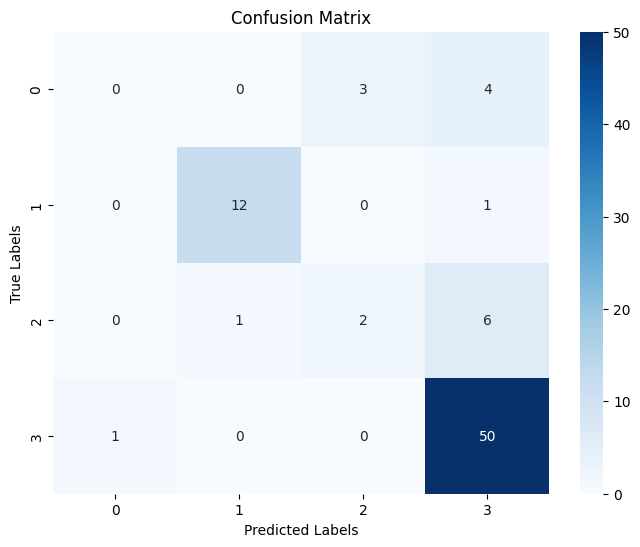

F1 Score: 0.7513392857142857


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



alpha = 0.5
nb = MultinomialNB(alpha=alpha)
nb.fit(count_train, y_train)

y_pred = nb.predict(count_test)

# Confusion Matrix with Labels
conf_matrix = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # Assuming y_test contains all possible class labels

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming `X_train` is your raw text data
vectorizer_synthetic = CountVectorizer()
vector_train = vectorizer_synthetic.fit_transform(X_train)


feature_names = vectorizer_synthetic.get_feature_names_out()
print(feature_names)

# Now you can fit your model
nb_s = MultinomialNB(alpha=alpha)
nb_s.fit(vector_train, y_train)

['00' '000' '0000' ... 'zq233' 'zukmavlardes' 'zyrtec']


MultinomialNB(alpha=0.5)

#### Each row in probabilities corresponds to a class, and each column corresponds to a feature. So I need to transpose 

In [34]:
log_prob = nb_s.feature_log_prob_
probabilities = np.exp(log_prob)
print(probabilities)

NameError: name 'np' is not defined

In [ ]:
synthetic_data = pd.DataFrame(probabilities.T, columns=["CURRENT SMOKER", "NON-SMOKER", "PAST SMOKER", "UNKNOWN"])
synthetic_data['Word'] = feature_names
synthetic_data

,CURRENT SMOKER,NON-SMOKER,PAST SMOKER,UNKNOWN,Word
0,0.000113,0.000278,0.000094,0.000992,00
1,0.000113,0.000833,0.000094,0.000470,000
2,0.000113,0.000093,0.000094,0.000052,0000
3,0.000113,0.000093,0.000094,0.000029,0004
4,0.000113,0.000093,0.000094,0.000017,0010
...,...,...,...,...,...
8328,0.000113,0.000093,0.000094,0.000017,zosyn
8329,0.000113,0.000093,0.000094,0.000029,zovirax
8330,0.000113,0.000093,0.000094,0.000017,zq233
8331,0.000113,0.000093,0.000094,0.000017,zukmavlardes


In [ ]:
np.random.choice(synthetic_data["Word"], p=synthetic_data["CURRENT SMOKER"])

'lasted'

In [ ]:
import numpy as np
def create_synthetic():

    # Your original training data
    original_data = data["Text"].values
    original_class = data["Smoking Status"].values

    # Your vocabulary
    vocabulary = features_names

    # Number of synthetic examples to generate for each original sentence
    num_synthetic_examples = 1

    # Generate synthetic data
    synthetic_dataset = []

    for i, original_sentence in enumerate(original_data):
        # Split the original sentence into words
        words = original_sentence.split()
        changed_words = []
        # if original_class[i] == "UNKNOWN":
        #     print(original_class[i])
        #     continue
        for w in words:
            # Randomly choose a word index to replace
            changed_word = np.random.choice(synthetic_data["Word"], p=synthetic_data[original_class[i]])
            changed_words.append(changed_word)

        # Join the words back into a synthetic sentence
        synthetic_sentence = ' '.join(changed_words)

        # Append the synthetic sentence to the list
        synthetic_dataset.append(synthetic_sentence)

    
    return synthetic_dataset

synthetic_dataset = create_synthetic()

In [ ]:
print(data["Text"].values[20:30])

['patient denies any alcohol or tobacco . family history: significant for'
 'was transfused 2 units of packed red blood cells .\nshe'
 'pain .\nshe does not smoke and has no history of'
 'multiple sclerosis admitted for the ensuerlpack medical center protocol group ii'
 'allergies .\nshe has never smoked . family history: significant for'
 'history: the patient denies any smoking history and reports occasional alcohol'
 'habits: the patient does not smoke .\nshe drinks one to'
 '. habits: no history of cigarette smoking . physical examination: the'
 'denies use of alcohol and tobacco .\nhe is married and'
 'fiancee .\nhe does not smoke , drink alcohol or use']


In [ ]:
X_train_s = synthetic_dataset
y_train_s = data["Smoking_enc"]

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_train_s, y_train_s, test_size=0.2, random_state=34, stratify=y_train_s
)

# 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming `X_train` is your raw text data
vectorizer_synthetic = CountVectorizer()
vector_train = vectorizer_synthetic.fit_transform(X_train_s)

vector_test = vectorizer_synthetic.transform(X_test_s)

feature_names = vectorizer_synthetic.get_feature_names_out()
print(feature_names)


['00' '000' '0000' ... 'zosyn' 'zq233' 'zyrtec']


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

alpha = 0.5
nb_t_s = MultinomialNB(alpha=alpha)
nb_t_s.fit(vector_train, y_train_s)
scores_s = cross_validate(nb_t_s, vector_train, y_train_s, return_train_score=True)
scores_s = pd.DataFrame(scores_s)
print(scores_s.head())

# Get the predictions on the test data
y_pred_s = nb_t_s.predict(vector_test)

# Print the accuracy score
print("Accuracy:", nb_t_s.score(vector_test, y_test_s))

# Print the F1 score
print("F1 Score:", f1_score(y_test_s, y_pred_s, average='weighted'))

   fit_time  score_time  test_score  train_score
0  0.002003    0.000661    0.843750          1.0
1  0.001877    0.000606    0.828125          1.0
2  0.001818    0.000627    0.796875          1.0
3  0.001803    0.000622    0.793651          1.0
4  0.001785    0.000589    0.809524          1.0
Accuracy: 0.85
F1 Score: 0.8405267295597483


In [ ]:
vectorizer_t_s = TfidfVectorizer(strip_accents="ascii")


# First fit the vectorizer with our training set
tfidf_train_t_s = vectorizer_t_s.fit_transform(X_train_s)
print(tfidf_train_t_s)
print(tfidf_train_t_s.shape)
print(vectorizer_t_s.get_feature_names_out())

#Now we can fit our test data with the same vectorizer
tfidf_test_t_s = vectorizer_t_s.transform(X_test_s)

  (0, 3608)	0.058405909879804
  (0, 3542)	0.0669837762513101
  (0, 1640)	0.05773496836598729
  (0, 3344)	0.04837623078881403
  (0, 6162)	0.13850554976217289
  (0, 7230)	0.0701717974370013
  (0, 6518)	0.12269460825067313
  (0, 37)	0.05352111569114185
  (0, 5344)	0.04293798786854342
  (0, 0)	0.05773496836598729
  (0, 1128)	0.09254487257467797
  (0, 831)	0.04208992116323509
  (0, 7402)	0.12269460825067313
  (0, 210)	0.06332630157170521
  (0, 7163)	0.12269460825067313
  (0, 3426)	0.04159581447382737
  (0, 843)	0.08838605096852777
  (0, 3401)	0.09580905532331324
  (0, 2277)	0.04436410015065847
  (0, 1145)	0.04293798786854342
  (0, 7174)	0.0570831992566701
  (0, 5022)	0.06463010596341241
  (0, 4216)	0.09411862528749922
  (0, 3082)	0.12269460825067313
  (0, 5873)	0.04927086964632896
  :	:
  (315, 996)	0.10977372900859945
  (315, 1186)	0.10917498628276427
  (315, 7520)	0.09705932953537151
  (316, 415)	0.3458288190277093
  (316, 5917)	0.3458288190277093
  (316, 7584)	0.32273585045072817
  (316,

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

alpha = 0.5
nb_t_s = MultinomialNB(alpha=alpha)
nb_t_s.fit(tfidf_train_t_s, y_train_s)
scores_t_s = cross_validate(nb_t_s, tfidf_train_t_s, y_train_s, return_train_score=True)
scores_t_s = pd.DataFrame(scores_t_s)
print(scores_t_s.head())

# Get the predictions on the test data
y_pred_s = nb_t_s.predict(tfidf_test_t_s)

# Print the accuracy score
print("Accuracy:", nb_t_s.score(tfidf_test_t_s, y_test_s))

# Print the F1 score
print("F1 Score:", f1_score(y_test_s, y_pred_s, average='weighted'))

   fit_time  score_time  test_score  train_score
0  0.001903    0.000645    0.640625     0.913386
1  0.001742    0.000643    0.625000     0.897638
2  0.001769    0.000603    0.625000     0.901575
3  0.001737    0.000630    0.650794     0.890196
4  0.001774    0.000607    0.634921     0.913725
Accuracy: 0.65
F1 Score: 0.5234065934065935
